In [31]:
# import libraries
from bs4 import BeautifulSoup
from splinter import Browser
import requests
import pandas as pd
import time

# set up
executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
browser = Browser("chrome", **executable_path, headless=True)

In [2]:
# URL of page to be scraped
url = 'https://mars.nasa.gov/news/'
browser.visit(url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')



<!DOCTYPE html>
<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;callback=_ate.cbs.rcb_8i810" type="text/javascript">
  </script>
  <script src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;jsonp=_ate.cbs.rcb_7ff90" type="text/javascript">
  </script>
  <script src="//graph.faceboo
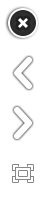
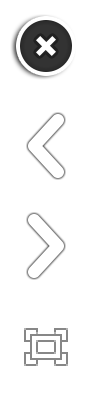
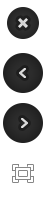
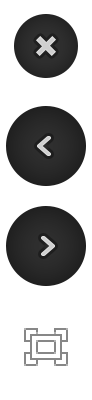
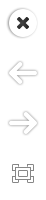
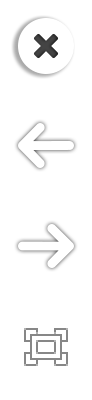
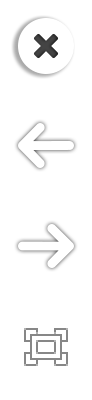
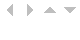

In [3]:
# print the html
print(soup.prettify())

In [4]:
# news_title = soup.find('div', class_='content_title').find('a').text
# news_title = news_title.replace('\n', '').replace('\r', '')
# news_title
soupyBody = soup.body
news_title = soupyBody.find("div", class_="content_title").find('a').text
news_title

# news_p = soupyBody.find("div", class_="article_teaser_body")
# news_p


'\nNASA Finds Ancient Organic Material, Mysterious Methane on Mars\n'

In [5]:
# =========================== Finding url of image on jet propulsion labratory =========================== #
url = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [6]:
# print the html
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 9]> <html class="no-js ie ie9" lang="en"> <![endif]-->
<!--[if IE 8]> <html class="no-js ie ie8" lang="en"> <![endif]-->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-" style="" xmlns="http://www.w3.org/1999/xhtml">
 <!-- START HEADER: "DEFAULT" -->
 <head>
  <script src="//m.addthis.com/live/red_lojson/300lo.json?si=5c789115a0efcff2&amp;bkl=0&amp;bl=1&amp;pdt=1021&amp;sid=5c789115a0efcff2&amp;pub=&amp;rev=v8.4.0-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2F%3Fsearch%3D%26category%3DMars&amp;fr=&amp;o

In [7]:
main_section = soup.find("section", class_="main_feature")

background_image_url = main_section.find("article", class_="carousel_item")['style']
raw_url = background_image_url.split("'")[1]
featured_image_url = 'https://www.jpl.nasa.gov' + raw_url
featured_image_url

'https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA00069-1920x1200.jpg'

In [8]:
# =========================== Finding weather from Mars Weather Report Twitter =========================== #
url = 'https://twitter.com/marswxreport?lang=en'
browser.visit(url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [9]:
# print the html
print(soup.prettify())

<!DOCTYPE html>
<html data-scribe-reduced-action-queue="true" lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <script nonce="">
   !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")&gt;-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
  </script>
  <script id="bouncer_terminate_iframe" nonce="">
   if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="ttft_boot_data" nonce="">
   window.ttftData={"transaction_id":"008e9cf400b2c3cb.67a17badea638257\u003c:00b8c7e900d890e4","server_request_start_time":1551405334482,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_a\/1.0.1\/20190206.2140.12b8a68","ttft_browser":"chrome"};!function(){function t(t,n){window.ttftData&amp;&amp;!window.ttftData[t]&amp;&amp;(window.tt

In [10]:
mars_weather = soup.find("div", class_="js-tweet-text-container").find("p", class_="tweet-text").text
mars_weather

'InSight sol 91 (2019-02-28) low -95.0ºC (-139.0ºF) high -13.9ºC (7.0ºF)\nwinds from the SW at 4.2 m/s (9.5 mph) gusting to 14.0 m/s (31.3 mph)\npressure at 7.20 hPapic.twitter.com/yCZi4ZZWYz'

In [11]:
# =========================== MARS FACTS =========================== #
url = 'https://space-facts.com/mars/'
browser.visit(url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [32]:
mars_table = soup.find_all('table')[0] # Grab the first table
mars_table = str(mars_table)

new_table = pd.read_html(mars_table)
new_table = new_table[0]
new_table

,0,1
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.42 x 10^23 kg (10.7% Earth)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.52 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-153 to 20 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [34]:
# =========================== HEMISPHERE IMAGES =========================== #

hemisphere_image_urls = [
    {'title':'Cerberus hemisphere','img_url':'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg'},
    {'title':'schiaparelli','img_url':'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg'},
    {'title':'valles marineris','img_url':'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg'},
    {'title':'syrtis major','img_url':'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg'}   
]
hemisphere_image_urls

[{'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg',
  'title': 'Cerberus hemisphere'},
 {'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg',
  'title': 'schiaparelli'},
 {'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg',
  'title': 'valles marineris'},
 {'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg',
  'title': 'syrtis major'}]